Name: Manvi Gawande

Email : manvigawande234@gmail.com

Github : https://github.com/Manvi234

LinkedIn : https://www.linkedin.com/in/manvi-gawande

## **FRAUD DETECTION**
The model is a classification model that classifies whether Fraud has taken place or not. If the Fraud has taken place then it is represented using 1 else by 0. The model used is Logistic Regression which is suitable for Binary Classification and the realtionship found between the independent and dependent variables graphically is a S-shape graph which an indicator of Logistic Regression

## **Importing Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [2]:
df = pd.read_csv('Fraud.csv')

## **Data Exploration**

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [5]:
df.info

<bound method DataFrame.info of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1            

In [6]:
df.shape

(1048575, 11)

In [7]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
df['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [9]:
type_count = pd.crosstab(type,df.type)

In [10]:
type_count

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
row_0,,,,,
<class 'type'>,227130,373641,7178,353873,86753


## **Data Visualization**

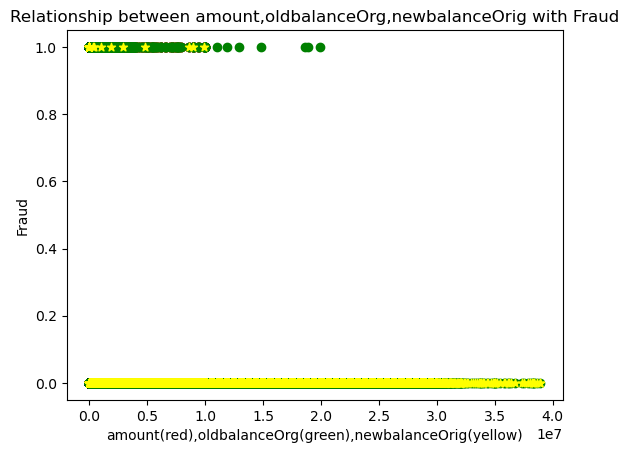

In [11]:
plt.scatter(df['amount'],df['isFraud'],color="red")
plt.scatter(df['oldbalanceOrg'],df['isFraud'],color="green")
plt.scatter(df['newbalanceOrig'],df['isFraud'],color="yellow",marker='*')
plt.title('Relationship between amount,oldbalanceOrg,newbalanceOrig with Fraud')
plt.ylabel('Fraud')
plt.xlabel('amount(red),oldbalanceOrg(green),newbalanceOrig(yellow)')
plt.show()

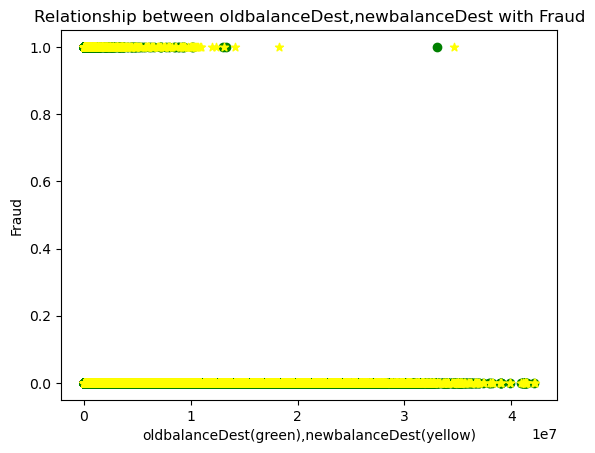

In [12]:
plt.scatter(df['oldbalanceDest'],df['isFraud'],color="green")
plt.scatter(df['newbalanceDest'],df['isFraud'],color="yellow",marker='*')
plt.title('Relationship between oldbalanceDest,newbalanceDest with Fraud')
plt.ylabel('Fraud')
plt.xlabel('oldbalanceDest(green),newbalanceDest(yellow)')
plt.show()

<AxesSubplot:xlabel='row_0'>

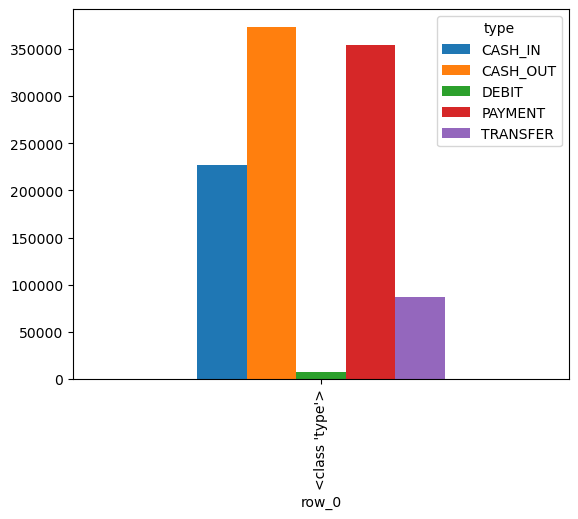

In [13]:
type_count.plot(kind = 'bar')

## **Handling The Missing Values**

In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df.dropna(axis="rows",inplace=True)

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df.shape

(1048575, 11)

## **Using Label Encoder for Type**

In [18]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **Scaling of Data**

In [20]:
max_amount = df['amount'].max()
df['amount'] = df['amount']/max_amount

In [21]:
max_oldbalanceOrg	= df['oldbalanceOrg'].max()
df['oldbalanceOrg'] = df['oldbalanceOrg']/max_oldbalanceOrg

In [22]:
max_newbalanceOrig	= df['newbalanceOrig'].max()
df['newbalanceOrig'] = df['newbalanceOrig']/max_newbalanceOrig

In [23]:
max_oldbalanceDest = df['oldbalanceDest'].max()
df['oldbalanceDest'] = df['oldbalanceDest']/max_oldbalanceDest

In [24]:
max_newbalanceDest = df['newbalanceDest'].max()
df['newbalanceDest'] = df['newbalanceDest']/max_newbalanceDest

In [25]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,0.000984,C1231006815,0.004374,0.004121,M1979787155,0.000000,0.000000,0,0
1,1,3,0.000186,C1666544295,0.000546,0.000498,M2044282225,0.000000,0.000000,0,0
2,1,4,0.000018,C1305486145,0.000005,0.000000,C553264065,0.000000,0.000000,1,0
3,1,1,0.000018,C840083671,0.000005,0.000000,C38997010,0.000503,0.000000,1,0
4,1,3,0.001167,C2048537720,0.001068,0.000768,M1230701703,0.000000,0.000000,0,0
5,1,3,0.000782,C90045638,0.001385,0.001184,M573487274,0.000000,0.000000,0,0
6,1,3,0.000711,C154988899,0.004709,0.004527,M408069119,0.000000,0.000000,0,0
7,1,3,0.000786,C1912850431,0.004527,0.004325,M633326333,0.000000,0.000000,0,0
8,1,3,0.000402,C1265012928,0.000069,0.000000,M1176932104,0.000000,0.000000,0,0
9,1,2,0.000534,C712410124,0.001072,0.000935,C195600860,0.000995,0.000956,0,0


## **Variable Selection**

The reasons for selecting the following variables:



*   X-varibles: There are the independent variables


1.   amount : amount indicates the amount of money involved in the trasaction.This is considered because frausters often target large transactions
2.   oldbalanceOrg : indicates the balance amount of the sender before transaction.
3.   newbalanceOrig : indicates the balance amount of the sender after transaction.
4.   oldbalanceDest : indicates the balance amount of the reciever before transaction
5.   newbalanceDest :indicates the balance amount of the reciever after transactions




The reasons for considering the points 2-5 is that : These features will help to identify frauds in ways like abnormally small or large transactions,repeated small transactions or a pattern in which the customer usually doesn't carry out his transactions
6.   type : indicates the type of transactions carried out by the user that help identifying fraudulent activities
7.   step : indicates the time so it can help in understanding a fraudsters activities


*   y-variable:The dependent variable
Here the y variable is isFraud because here using the X variables we have to classify whether a fraud takes place or not.

In [26]:
X = df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis = 1)
y = df.isFraud

## **Splitting the data into Training data and Testing data**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [28]:
len(X_train)

734002

In [29]:
len(X_test)

314573

## **Building a Model**



The reason for choosing Logistic Regression is evident from the graph that shows the relationship between the independent and dependent variables.


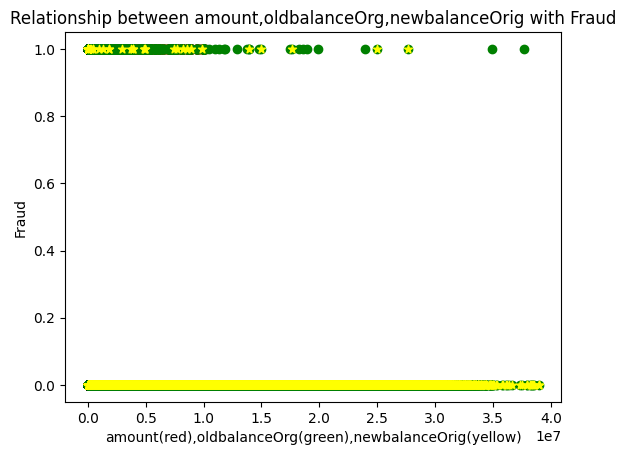


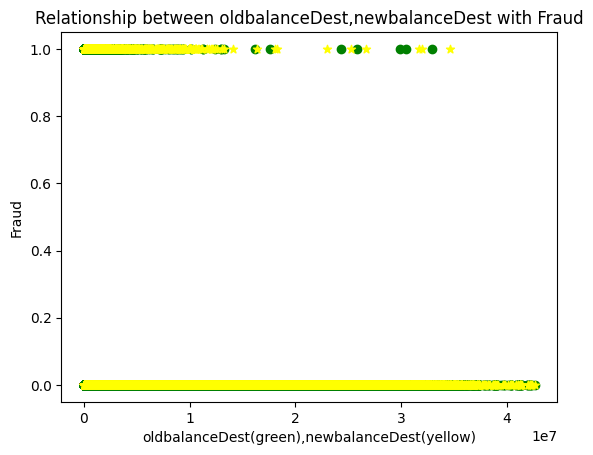



We can observe in the graph that we get an **S-SHAPE** Graph which indicates that we can use Logistic Regression as **Logistic Regression** makes use of **sigmoid function** which too is represented by **S-SHAPE** Graphically.Therefore Logistic Regression can be a suitable selection for carrying out this **binary classification**

In [30]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model.score(X_test,y_test)

1.0

In [32]:
y_pred = model.predict(X_test)

## **Checking the Accuracy of the Model**

<AxesSubplot:>

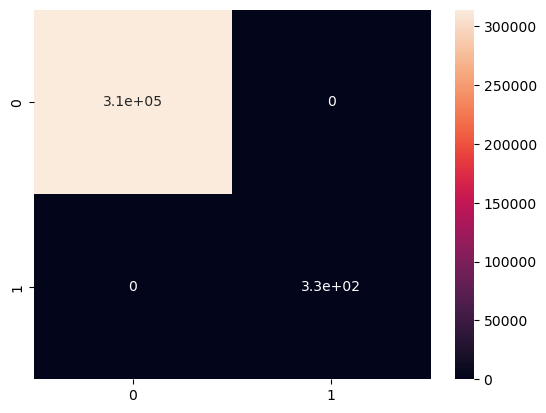

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


In [34]:
precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
accuracy_score = accuracy_score(y_test,y_pred)

In [35]:
print("precision_score \t recall_score \t f1_score \t accuracy_score  ")
print(precision_score ," \t\t\t " ,recall_score," \t\t " ,f1_score," \t\t " ,accuracy_score)

precision_score 	 recall_score 	 f1_score 	 accuracy_score  
1.0  			  1.0  		  1.0  		  1.0


Question Asked in Task Details


Kind of prevention the company should adopt to update infrastructure

Ans.The Kind of prevention the company should adopt are as follows:

*  Consistently audit and check for fraud hazards. This entails constantly checking your fraud detection system to make sure it is current and efficient at spotting fraud.
*  Inform everyone in your company about your fraud detection system. This will make it easier for staff members to spot and report any fraud.
*  Regularly update your fraud profiles. You will need to adjust your fraud risk profile and fraud detection system as the fraud landscape changes.
numerous reporting channels. Employees should have various options for reporting fraud suspicions, including email, phone, and in-person reporting.

Assuming these actions have been implemented, how would you determine if they work?

Ans. Fraud Rate ,Final Approval Rate ,Precision ,Recall and Decline Rate